In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finaldivvy/bq-results-20240717-042041-1721190391637.csv


# Understanding the situation
**This notebook is constructed to answer the question: "How member and casual ride Divvy bikes differently ?" and also provide relevant statistics to backup the findings** 

This dataset has been cleaned, transformed and sampled from GoogleBigQuery. In this notebook, i will do the following activities:
* Understand the data clearly by answering question like: what types is the data, what purpose does it serves,...
* Do univariate analysis, multivariable analysis, transform data in different ways, visuallization, find correlation, hypothesis testing,...etc
* Come up with recommendations from findings

# Understanding the data
**Let's import the data**

In [2]:
df = pd.read_csv("/kaggle/input/finaldivvy/bq-results-20240717-042041-1721190391637.csv")
df.head(10)

/tmp/ipykernel_413/1879097550.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/finaldivvy/bq-results-20240717-042041-1721190391637.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,5C4AD152F390AFB1,classic_bike,2024-01-10 19:12:26 UTC,2024-01-10 19:25:24 UTC,Clark St & Randolph St,TA1305000030,Racine Ave & Congress Pkwy,TA1306000025,41.884576,-87.631890,41.87464,-87.65703,member,1,778,12,2.356427,Wednesday,19
1,2FF4038A118D01C3,classic_bike,2024-01-28 15:05:09 UTC,2024-01-28 15:12:56 UTC,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,member,1,467,7,1.150154,Sunday,15
2,C7EDADC192B75741,classic_bike,2024-01-08 15:33:30 UTC,2024-01-08 15:53:30 UTC,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1200,20,2.205058,Monday,15
3,DBD964B55DF21A7D,classic_bike,2024-01-08 15:34:30 UTC,2024-01-08 15:53:28 UTC,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1138,18,2.205058,Monday,15
4,0E925D5B602875F6,classic_bike,2024-01-26 14:02:31 UTC,2024-01-26 14:15:04 UTC,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,753,12,2.205058,Friday,14
5,31F7EA85AADC4BCD,classic_bike,2024-01-24 17:53:10 UTC,2024-01-24 18:16:16 UTC,Wabash Ave & 9th St,TA1309000010,Racine Ave & Congress Pkwy,TA1306000025,41.870769,-87.625734,41.87464,-87.65703,member,1,1386,23,2.626789,Wednesday,17
6,3F3544B13CC0B3E3,classic_bike,2024-01-04 11:23:43 UTC,2024-01-04 11:28:56 UTC,Paulina St & Flournoy St,KA1504000104,Racine Ave & Congress Pkwy,TA1306000025,41.873061,-87.669135,41.87464,-87.65703,member,1,313,5,1.017517,Thursday,11
7,9C8EA4C67DF21DE1,classic_bike,2024-01-31 17:26:18 UTC,2024-01-31 17:31:36 UTC,Paulina St & Flournoy St,KA1504000104,Racine Ave & Congress Pkwy,TA1306000025,41.873061,-87.669135,41.87464,-87.65703,member,1,318,5,1.017517,Wednesday,17
8,333AD9D07161322F,classic_bike,2024-01-30 18:07:47 UTC,2024-01-30 18:14:11 UTC,Paulina St & Flournoy St,KA1504000104,Racine Ave & Congress Pkwy,TA1306000025,41.873061,-87.669135,41.87464,-87.65703,member,1,384,6,1.017517,Tuesday,18
9,C6EB8E51BAB4E40A,classic_bike,2024-01-25 17:26:02 UTC,2024-01-25 17:39:21 UTC,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,casual,1,799,13,1.150154,Thursday,17


**Looking at the few first rows, i have a few observations:**
* Each rows seem to represent a time where customers uses a Divvy Bike
* Customer can choose from electric_bike or classic_bike
* Each rows also have location of start point and endpoint as well as the time
* Each rides have an unique id
* Each station have an unique id

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668722 entries, 0 to 668721
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ride_id                 668722 non-null  object 
 1   rideable_type           668722 non-null  object 
 2   started_at              668722 non-null  object 
 3   ended_at                668722 non-null  object 
 4   start_station_name      581884 non-null  object 
 5   start_station_id        581884 non-null  object 
 6   end_station_name        576684 non-null  object 
 7   end_station_id          576684 non-null  object 
 8   start_lat               668722 non-null  float64
 9   start_lng               668722 non-null  float64
 10  end_lat                 668722 non-null  float64
 11  end_lng                 668722 non-null  float64
 12  member_casual           668722 non-null  object 
 13  month                   668722 non-null  int64  
 14  ride_length_secs    

**Looking at the info table:**
* The name and id seem to have some null values that were missing. Since it would not affect the result in our question i will ignore it
* The dataset have 10 thousands observations as expected
* The type of each columns seems odd as started_at, ended_at and ride_length should be date_time so we will change it back

In [4]:
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668722 entries, 0 to 668721
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   ride_id                 668722 non-null  object             
 1   rideable_type           668722 non-null  object             
 2   started_at              668722 non-null  datetime64[ns, UTC]
 3   ended_at                668722 non-null  datetime64[ns, UTC]
 4   start_station_name      581884 non-null  object             
 5   start_station_id        581884 non-null  object             
 6   end_station_name        576684 non-null  object             
 7   end_station_id          576684 non-null  object             
 8   start_lat               668722 non-null  float64            
 9   start_lng               668722 non-null  float64            
 10  end_lat                 668722 non-null  float64            
 11  end_lng                 66

**As can be seen we have successfully change it back to datetime**

In [6]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,month,ride_length_secs,ride_length_mins,distance_in_kilometers,started_hour
count,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000,668722.000000
mean,41.899286,-87.646908,41.899570,-87.647032,2.234337,791.495584,12.703267,1.890240,13.721573
std,0.047142,0.027405,0.047261,0.027491,0.782206,2259.494942,37.656501,1.734732,4.702697
min,41.648501,-87.844110,41.630000,-87.870000,1.000000,-2617.000000,-43.000000,0.000000,0.000000
25%,41.879569,-87.660984,41.880000,-87.661198,2.000000,289.000000,4.000000,0.824857,10.000000
50%,41.894733,-87.643819,41.895501,-87.643948,2.000000,487.000000,8.000000,1.381710,14.000000
75%,41.928773,-87.630000,41.928887,-87.630000,3.000000,843.000000,14.000000,2.401104,17.000000
max,42.070000,-87.528232,42.080000,-87.460000,3.000000,90562.000000,1509.000000,31.124978,23.000000


**From the description table:**
* Longitude and latitude seems to be distributed correctly in the area of 41 and -87 as we are in Chicago
* Month seems to be correct with January, Febuary, March
* Distance seems rather normal with mean of around 2 km but riding a bikes for 18 km is a bit extreme so we will have to look into that
* Ride_length is also peculiar as the maximum is one day and the minimum is minus one day which frankly makes no sense when riding a bike

# Investigate the variable
**As what we are doing is trying to answer the question differentiating between member and casual riders and try to classify types of user let's first focus on member_casual:**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

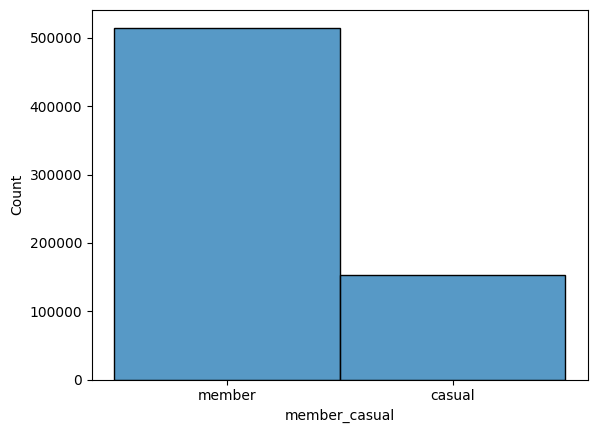

In [7]:
sns.histplot(x=df['member_casual'])

**As can be seen:**
* There are 2 types of riders: member and casual
* The number of riders is significantly higher than casual riders almost triple

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

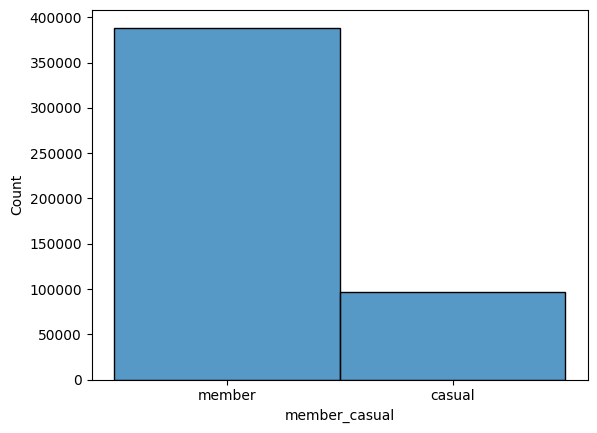

In [8]:
below_mean_rider = df[df['ride_length_secs']<= np.mean(df['ride_length_secs'])]
sns.histplot(x=below_mean_rider['member_casual'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='member_casual', ylabel='Count'>

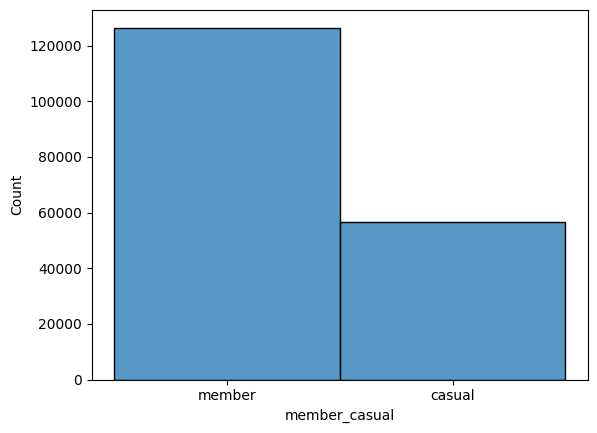

In [9]:
above_mean_rider = df[df['ride_length_secs']> np.mean(df['ride_length_secs'])]
sns.histplot(x=above_mean_rider['member_casual'])

In [10]:
ratioa = len(above_mean_rider[above_mean_rider['member_casual']=='casual'])/len(df[df['member_casual']=='casual'])
print('The percentage of casual rider riding above mean ride length:',ratioa*100,'%')

The percentage of casual rider riding above mean ride length: 36.86516824669236 %


In [11]:
ratiob = len(above_mean_rider[above_mean_rider['member_casual']=='member'])/len(df[df['member_casual']=='member'])
print('The percentage of member rider riding above mean ride length:',ratiob*100,'%')

The percentage of member rider riding above mean ride length: 24.554003005020014 %


**From graphs and calculations, it is reasonable to conclude:**
* Casual riders likes to ride for longer length of time than member riders
* The ration between member and rider are too high so using average and sum would not generate accurate insights

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x7dcb35dc2ef0>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

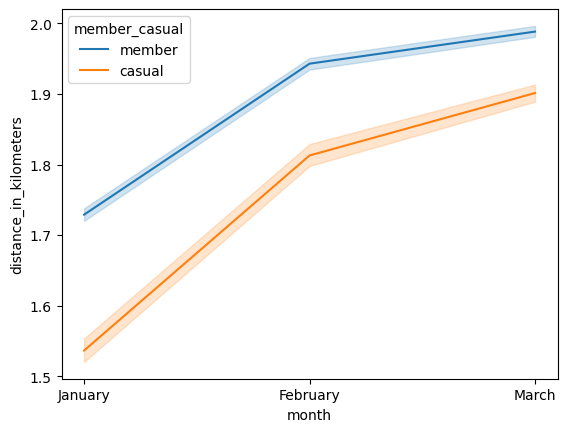

In [12]:
sns.lineplot(x=df['month'],y=df['distance_in_kilometers'],hue=df['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x7dcb35e8d0f0>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

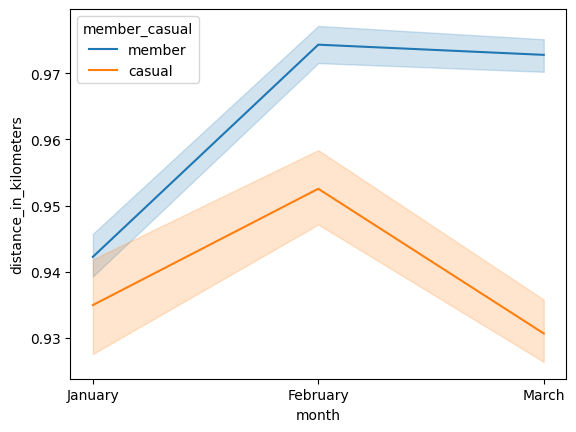

In [13]:
below_mean_distance = df[df['distance_in_kilometers']<= np.mean(df['distance_in_kilometers'])]
sns.lineplot(x=below_mean_distance['month'],y=below_mean_distance['distance_in_kilometers'],hue=below_mean_distance['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

([<matplotlib.axis.XTick at 0x7dcb35d2ec20>,
 [Text(1, 0, 'January'), Text(2, 0, 'February'), Text(3, 0, 'March')])

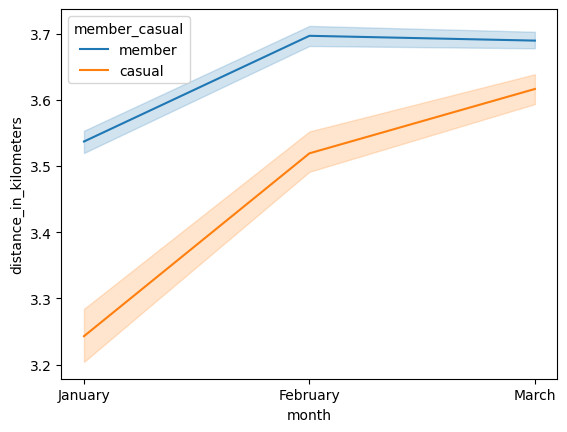

In [14]:
above_mean_distance = df[df['distance_in_kilometers']> np.mean(df['distance_in_kilometers'])]
sns.lineplot(x=above_mean_distance['month'],y=above_mean_distance['distance_in_kilometers'],hue=above_mean_distance['member_casual'])
plt.xticks([1, 2, 3], ['January', 'February', 'March']) 

In [15]:
ratioa = len(above_mean_distance[above_mean_distance['member_casual']=='casual'])/len(df[df['member_casual']=='casual'])
print('The percentage of casual rider riding above mean distance:',ratioa*100,'%')

The percentage of casual rider riding above mean distance: 33.73788936347536 %


In [16]:
ratiob = len(above_mean_distance[above_mean_distance['member_casual']=='member'])/len(df[df['member_casual']=='member'])
print('The percentage of member rider riding above mean distance:',ratiob*100,'%')

The percentage of member rider riding above mean distance: 35.116221284393696 %


**Looking at the line plot and calculations it is easily spotted:**
* Casual and members does not have much difference when it comes to distance ride
* This could mean that the speed at which casual riders ride might be slower than member rider

<Axes: xlabel='count', ylabel='month'>

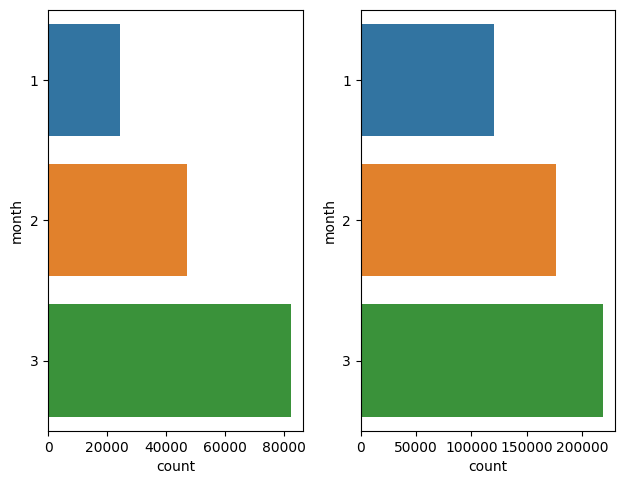

In [17]:
casual_df = df[df['member_casual']=='casual']
member_df = df[df['member_casual']=='member']
import matplotlib.pyplot as plt

# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(y=casual_df['month'], ax=axes[0])
sns.countplot(y=member_df['month'], ax=axes[1])

<Axes: xlabel='count', ylabel='day_of_week'>

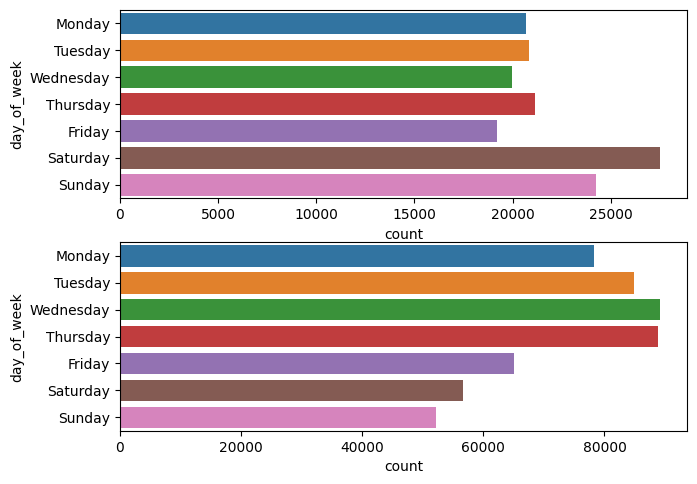

In [18]:
# Creating subplot axes
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(y=casual_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[0])
sns.countplot(y=member_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[1])

<Axes: xlabel='ride_length_secs', ylabel='day_of_week'>

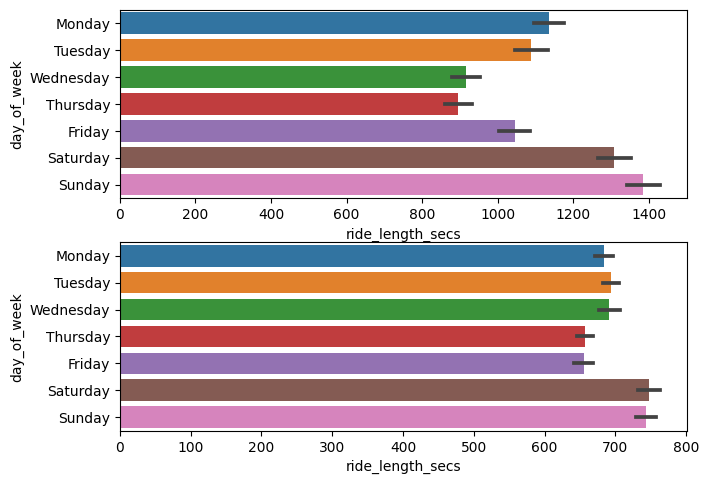

In [19]:
# Creating subplot axes
fig, axes = plt.subplots(2,1)
plt.tight_layout()
# Iterating through axes and names
sns.barplot(x=df['ride_length_secs'],y=casual_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[0])
sns.barplot(x=df['ride_length_secs'],y=member_df['day_of_week'], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[1])

**From the above tables, we can conclude:**
* Casual riders like riding on the weekends
* Member riders seem to prefer the weekdays

<Axes: xlabel='rideable_type', ylabel='count'>

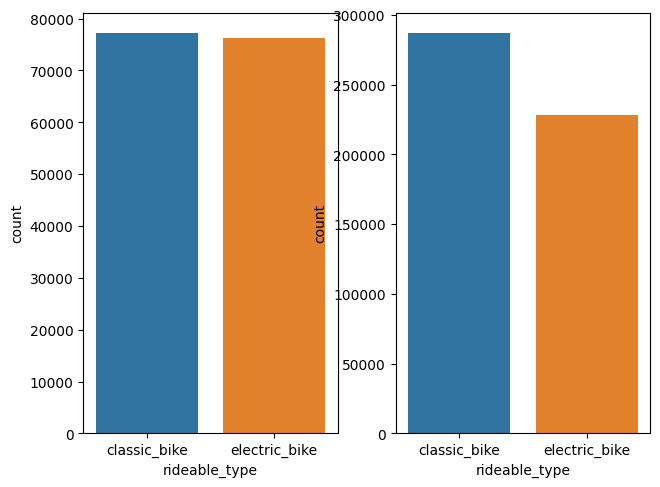

In [20]:
# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(x=casual_df['rideable_type'], ax=axes[0])
sns.countplot(x=member_df['rideable_type'], ax=axes[1])

**It also seems like:**
* Casual riders used classic bikes and electric bikes equally
* Members riders prefered classic bikes

<Axes: xlabel='started_hour', ylabel='ride_length_secs'>

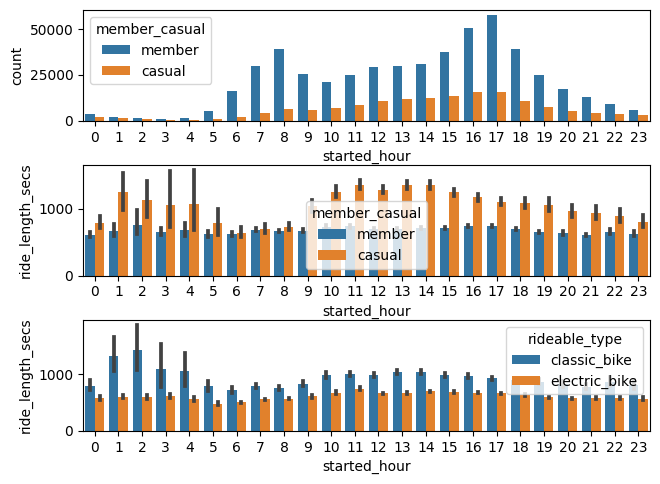

In [21]:
# Creating subplot axes
fig, axes = plt.subplots(3,1)
plt.tight_layout()
# Iterating through axes and names
sns.countplot(x=df['started_hour'], hue=df['member_casual'], ax=axes[0])
sns.barplot(y=df['ride_length_secs'],x=df['started_hour'], hue=df['member_casual'], ax=axes[1])
sns.barplot(y=df['ride_length_secs'],x=df['started_hour'], hue=df['rideable_type'], ax=axes[2])

**Conclusions:**
* Member seems to enjoy morning rides and evening rides
* Casual only enjoys afternoon rides especially from 16-17 which is when most people got off work
* This also reinforce classic bikes are more popular

In [22]:
# Top 10 average duration by type of bike from-to station
dfg = pd.DataFrame(df.groupby(['rideable_type','member_casual','start_station_name','end_station_name', 'started_hour'])['ride_length_mins'].mean().nlargest(10).sort_values(ascending=False).reset_index())
dfg.columns=['rideable_type','member_casual','start_station_name','end_station_name', 'started_rent(hour)', 'average_duration_trip']
dfg

,rideable_type,member_casual,start_station_name,end_station_name,started_rent(hour),average_duration_trip
0,classic_bike,member,Lincoln Ave & Addison St,Clark St & Winnemac Ave,9,1481.0
1,classic_bike,casual,McClurg Ct & Ohio St,Clark St & Lincoln Ave,18,1478.0
2,classic_bike,member,Lincoln Ave & Waveland Ave,Lincoln Ave & Roscoe St*,9,1472.0
3,classic_bike,member,DuSable Lake Shore Dr & Monroe St,McClurg Ct & Erie St,16,1467.0
4,classic_bike,member,Aberdeen St & Jackson Blvd,Delano Ct & Roosevelt Rd,18,1462.0
5,classic_bike,member,State St & 33rd St,Shields Ave & 28th Pl,13,1460.0
6,classic_bike,casual,Halsted St & Fulton St,Franklin St & Illinois St,16,1453.0
7,classic_bike,casual,Clark St & Armitage Ave,Sedgwick St & Webster Ave,13,1450.0
8,classic_bike,member,Kingsbury St & Kinzie St,Clark St & Elm St,15,1437.0
9,classic_bike,casual,Delano Ct & Roosevelt Rd,Dearborn St & Van Buren St,15,1429.0


In [23]:
#import plotly.express as px
#import pandas as pd
#color_scale = [(0, 'orange'), (1,'red')]

#fig = px.scatter_mapbox(df, 
                        #lat="start_lat", 
                        #lon="start_lng", 
                        #hover_name="ride_id", 
                        #hover_data=["start_station_name", "start_station_id"],
                        #color="member_casual",
                        #color_continuous_scale=color_scale,
                        #size="distance_in_kilometers",
                        #zoom=8, 
                        #height=800,
                        #width=800)

#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

In [24]:
#import plotly.express as px
#import pandas as pd
#color_scale = [(0, 'orange'), (1,'red')]

#fig = px.scatter_mapbox(df, 
                        #lat="end_lat", 
                        #lon="end_lng", 
                        #hover_name="ride_id", 
                        #hover_data=["end_station_name", "end_station_id"],
                        #color="member_casual",
                        #color_continuous_scale=color_scale,
                        #size="distance_in_kilometers",
                        #zoom=8, 
                        #height=800,
                        #width=800)

#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

# Preprocess the data
**Let's start by finding missing values**

In [25]:
df.isnull().sum()

ride_id                       0
rideable_type                 0
started_at                    0
ended_at                      0
start_station_name        86838
start_station_id          86838
end_station_name          92038
end_station_id            92038
start_lat                     0
start_lng                     0
end_lat                       0
end_lng                       0
member_casual                 0
month                         0
ride_length_secs              0
ride_length_mins              0
distance_in_kilometers        0
day_of_week                   0
started_hour                  0
dtype: int64

**Looking at the number of blank values:**
* As stated above, the null values might be a result of user or the system so imputation would not be probable
* I will proceed to drop them for a smooth model training

In [26]:
new_df = df.dropna()
new_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,5C4AD152F390AFB1,classic_bike,2024-01-10 19:12:26+00:00,2024-01-10 19:25:24+00:00,Clark St & Randolph St,TA1305000030,Racine Ave & Congress Pkwy,TA1306000025,41.884576,-87.631890,41.87464,-87.65703,member,1,778,12,2.356427,Wednesday,19
1,2FF4038A118D01C3,classic_bike,2024-01-28 15:05:09+00:00,2024-01-28 15:12:56+00:00,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,member,1,467,7,1.150154,Sunday,15
2,C7EDADC192B75741,classic_bike,2024-01-08 15:33:30+00:00,2024-01-08 15:53:30+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1200,20,2.205058,Monday,15
3,DBD964B55DF21A7D,classic_bike,2024-01-08 15:34:30+00:00,2024-01-08 15:53:28+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,1138,18,2.205058,Monday,15
4,0E925D5B602875F6,classic_bike,2024-01-26 14:02:31+00:00,2024-01-26 14:15:04+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,member,1,753,12,2.205058,Friday,14


In [27]:
new_df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        0
start_station_id          0
end_station_name          0
end_station_id            0
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
month                     0
ride_length_secs          0
ride_length_mins          0
distance_in_kilometers    0
day_of_week               0
started_hour              0
dtype: int64

**There are no more null to be found let's move on to outliers**

In [28]:
new_df.describe()

,start_lat,start_lng,end_lat,end_lng,month,ride_length_secs,ride_length_mins,distance_in_kilometers,started_hour
count,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000,528822.000000
mean,41.897086,-87.644778,41.897403,-87.644909,2.220244,811.978948,13.043313,1.859197,13.668062
std,0.045827,0.025755,0.045939,0.025802,0.775989,2215.978537,36.933579,1.689093,4.637445
min,41.648501,-87.844110,41.648501,-87.843960,1.000000,-2.000000,0.000000,0.000000,0.000000
25%,41.878317,-87.658617,41.879255,-87.658617,2.000000,298.000000,4.000000,0.810751,10.000000
50%,41.893808,-87.641697,41.893992,-87.641697,2.000000,501.000000,8.000000,1.357750,14.000000
75%,41.924161,-87.629430,41.924816,-87.629521,3.000000,866.000000,14.000000,2.358758,17.000000
max,42.064854,-87.528232,42.064854,-87.528232,3.000000,90562.000000,1509.000000,30.378686,23.000000


**Looking at the table:**
* The distance columns have a mean of 1.88 but the max value is 30 which is almost 30 times higher and it is unusual for someone to ride 30km
* Ride length wise the mean is 13 minutes but the min values is 0 which is definitely wrong

<Axes: xlabel='ride_length_secs'>

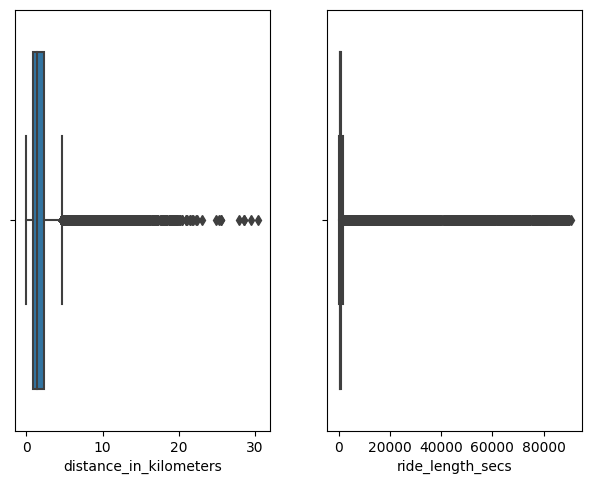

In [29]:
# Creating subplot axes
fig, axes = plt.subplots(1,2)
plt.tight_layout()
# Iterating through axes and names
sns.boxplot(x=new_df['distance_in_kilometers'], hue=df['member_casual'], ax=axes[0])
sns.boxplot(x=new_df['ride_length_secs'], hue=df['member_casual'], ax=axes[1])

**Looking at the 2 box plot:**
* We have a lot more outliers than expected
* It seems that most of them are collective outliers

<Axes: xlabel='distance_in_kilometers', ylabel='ride_length_secs'>

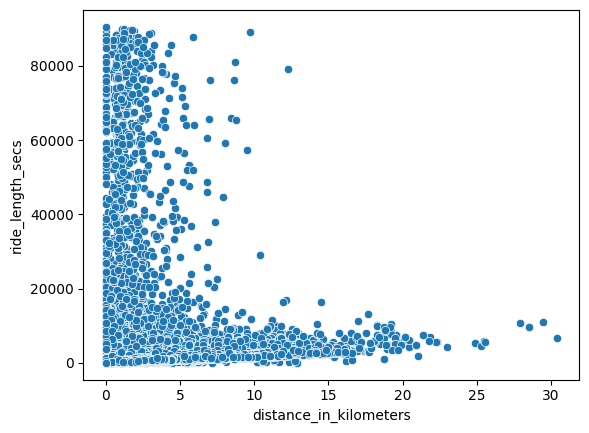

In [30]:
sns.scatterplot(x=new_df['distance_in_kilometers'],y=new_df['ride_length_secs'])

**From the graph above:**
* Distance and ride length have very slight correlation
* It is not realistic spending more than 10000 seconds to ride less than 10 km and only 1000 seconds to ride more than 10 km but this need further investigation and i dont have the data to investigate them as i can not take into consideration user mistake for not returning bike or what they do when they stop riding bikes to do another thing. According to statista an average bike share of the US citizens is around 15.5 minutes. Accounting for outliers let's eliminate any rides that last more than 45 minutes which is roughly 2700 seconds

In [32]:
final_df = new_df[new_df['ride_length_secs']<2700]

<Axes: xlabel='distance_in_kilometers', ylabel='ride_length_secs'>

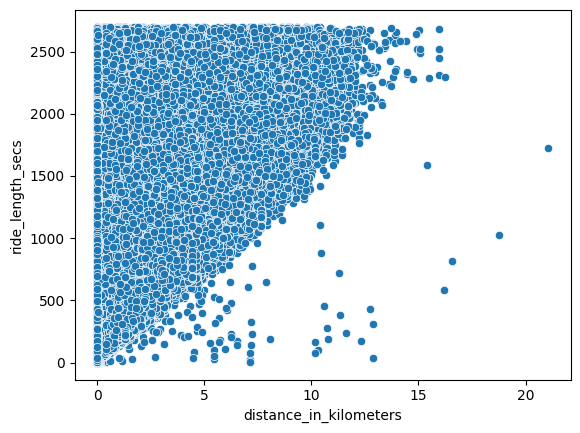

In [33]:
sns.scatterplot(x=final_df['distance_in_kilometers'],y=final_df['ride_length_secs'])

**As can be seen:**
* Ride length and distance have a much more visual correlation now, and rid of outliers

In [36]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

label_encoder.fit_transform(final_df['member_casual']) 
label_encoder.fit_transform(final_df['day_of_week']) 
label_encoder.fit_transform(final_df['rideable_type']) 
final_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,5C4AD152F390AFB1,0,2024-01-10 19:12:26+00:00,2024-01-10 19:25:24+00:00,Clark St & Randolph St,TA1305000030,Racine Ave & Congress Pkwy,TA1306000025,41.884576,-87.631890,41.87464,-87.65703,1,1,778,12,2.356427,6,19
1,2FF4038A118D01C3,0,2024-01-28 15:05:09+00:00,2024-01-28 15:12:56+00:00,Desplaines St & Jackson Blvd,15539,Racine Ave & Congress Pkwy,TA1306000025,41.878119,-87.643948,41.87464,-87.65703,1,1,467,7,1.150154,3,15
2,C7EDADC192B75741,0,2024-01-08 15:33:30+00:00,2024-01-08 15:53:30+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,1,1,1200,20,2.205058,1,15
3,DBD964B55DF21A7D,0,2024-01-08 15:34:30+00:00,2024-01-08 15:53:28+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,1,1,1138,18,2.205058,1,15
4,0E925D5B602875F6,0,2024-01-26 14:02:31+00:00,2024-01-26 14:15:04+00:00,Delano Ct & Roosevelt Rd,KA1706005007,Racine Ave & Congress Pkwy,TA1306000025,41.867491,-87.632190,41.87464,-87.65703,1,1,753,12,2.205058,0,14


In [37]:
h_df = final_df.loc[:,'start_lat':'started_hour']

h_df.head()

,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
0,41.884576,-87.631890,41.87464,-87.65703,1,1,778,12,2.356427,6,19
1,41.878119,-87.643948,41.87464,-87.65703,1,1,467,7,1.150154,3,15
2,41.867491,-87.632190,41.87464,-87.65703,1,1,1200,20,2.205058,1,15
3,41.867491,-87.632190,41.87464,-87.65703,1,1,1138,18,2.205058,1,15
4,41.867491,-87.632190,41.87464,-87.65703,1,1,753,12,2.205058,0,14


<Axes: >

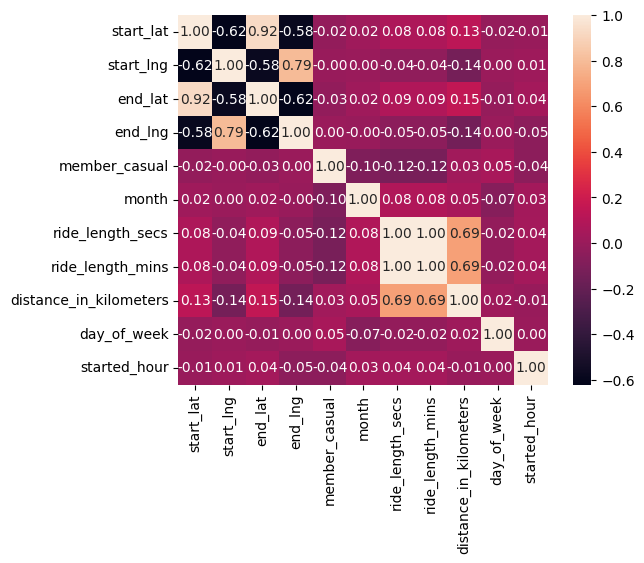

In [38]:
sns.heatmap(data=h_df.corr(),square=True,annot=True, fmt='.2f')

**From the heatmap:**
* member_casual seems to have no apparent relationships
* ride length and distance may have a correlation

# Hypothesis Testing
**In this section, we will do some hypothesis testing to reinforce some of our findings:**
* Do casual members rides a longer time than member riders on average ?
* Do casual members rides the same distance as member riders on average ?
* Do riders on average likes classic bikes than electric bikes ?

In [40]:
final_df.groupby("member_casual")["ride_length_secs"].mean()

member_casual
0    757.458648
1    606.761307
Name: ride_length_secs, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ride_length_secs', ylabel='Count'>

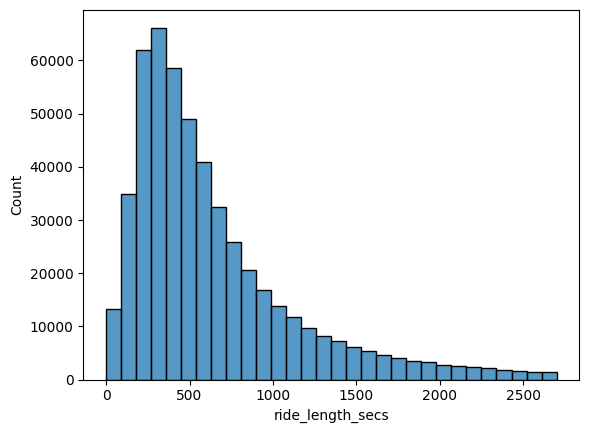

In [41]:
sns.histplot(final_df['ride_length_secs'],bins=30)

**Since the distribution is slightly skewed, our hypothesis may not be of great statistical significance**

**$H_0$**: Casual members rides on average for a longer duration or equal than member riders

**$H_A$**: Casual members rides on average for a less duration than member riders

I would choose 5% as the significance level and proceed with a one-tailed two-sample t-test.

In [45]:
from scipy.stats import ttest_ind
member = final_df[final_df["member_casual"] == 1]["ride_length_secs"]
casual = final_df[final_df["member_casual"] == 0]["ride_length_secs"]

ttest, pval = ttest_ind(casual, member, alternative="less")

print("t-test",ttest)
print("p-value",pval)

t-test 89.04886159914896
p-value 1.0


**Conclusion:**
* p-value is larger than significance level so we can conclude that the ride duration of casual member is statistically significantly higher than member riders

**$H_0$**: Casual members rides on average the same length than member riders

**$H_A$**: Casual members rides on average not the same length than member riders

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance_in_kilometers', ylabel='Count'>

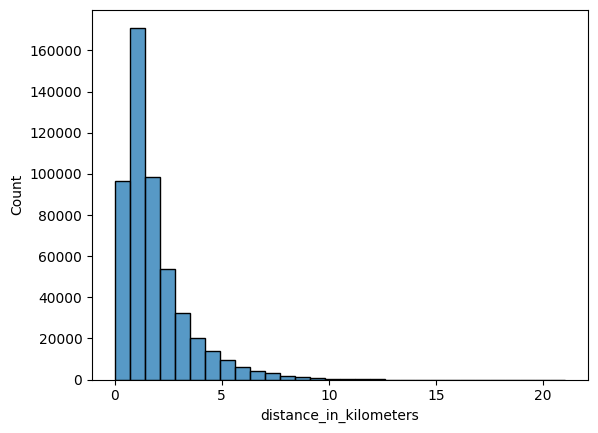

In [46]:
sns.histplot(final_df['distance_in_kilometers'],bins=30)

**Since the distribution is slightly skewed, our hypothesis may not be of great statistical significance**

I would choose 5% as the significance level and proceed with a two-tailed two-sample t-test.

In [48]:
member = final_df[final_df["member_casual"] == 1]["distance_in_kilometers"]
casual = final_df[final_df["member_casual"] == 0]["distance_in_kilometers"]

ttest, pval = ttest_ind(casual, member, equal_var=False)

print("t-test",ttest)
print("p-value",pval)

t-test -21.87319080852718
p-value 6.312799285178282e-106


**Conclusion:**
* p-value is extremely small much smaller than significance level so we can reject the null hypothesis in favor of the alternative. Let's conduct a one-tailed two-sample t-test to figure out more

**$H_0$**: Casual members rides on average longer distance or equal than member riders

**$H_A$**: Casual members rides on average less distance than member riders

I would choose 5% as the significance level and proceed with a one-tailed two-sample t-test.

In [50]:
ttest, pval = ttest_ind(casual, member, equal_var=False, alternative="less")

print("t-test",ttest)
print("p-value",pval)

t-test -21.87319080852718
p-value 3.156399642589141e-106


**Conclusion:**
* p-value is extremely small so we can reject the null hypothesis in favor of the alternative hypothesis that casual members ride less distance

In [51]:
new_df.groupby("rideable_type")["ride_length_secs"].mean()

rideable_type
classic_bike     901.776921
electric_bike    613.066172
Name: ride_length_secs, dtype: float64

**$H_0$**: Mean duration ridden on classic bikes is larger than or equal to that of electric bikes

**$H_A$**: Mean duration ridden on classic bikes is less than or equal to that of electric bikes

I would choose 5% as the significance level and proceed with a one-tailed two-sample t-test.

In [52]:
classic = final_df[final_df["rideable_type"] == 0]["ride_length_secs"]
electric = final_df[final_df["rideable_type"] == 1]["ride_length_secs"]

ttest, pval = ttest_ind(classic, electric, alternative="less")

print("t-test",ttest)
print("p-value",pval)

t-test 73.41814272289503
p-value 1.0


**Conclusion:**
* p-value is 1 much higher than significance level so we can accept the null hypothesis to conclude that classic_bikes have statistically higher ridden time than electric bikes

# Regression Analysis
**Let's start by creating a pairplot**

In [53]:
train_df = final_df.sample(n=1000, replace=True)
train_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,ride_length_secs,ride_length_mins,distance_in_kilometers,day_of_week,started_hour
176677,DBE749057C1DFA3A,0,2024-02-29 19:20:52+00:00,2024-02-29 19:35:49+00:00,Clinton St & Jackson Blvd,638,May St & Taylor St,13160,41.878317,-87.640981,41.869482,-87.655486,1,2,897,14,1.551591,4,19
264165,5155F78301B936C3,0,2024-02-07 06:23:46+00:00,2024-02-07 06:28:46+00:00,Clinton St & Washington Blvd,WL-012,LaSalle St & Jackson Blvd,TA1309000004,41.883380,-87.641170,41.878166,-87.631929,1,2,300,5,0.959915,6,6
268806,9E42EA0A39AD45AF,0,2024-02-28 13:15:18+00:00,2024-02-28 13:24:13+00:00,Ellis Ave & 60th St,KA1503000014,Blackstone Ave & 59th St,22004,41.785097,-87.601073,41.787877,-87.590461,1,2,535,8,0.932548,6,13
388613,D0C36E9E2A386C90,0,2024-03-18 08:13:12+00:00,2024-03-18 08:27:33+00:00,Loomis St & Jackson Blvd,13206,Daley Center Plaza,TA1306000010,41.877945,-87.662007,41.884241,-87.629634,1,3,861,14,2.770033,1,8
651304,1383608E6D7903B5,1,2024-03-02 20:28:39+00:00,2024-03-02 20:30:38+00:00,Michigan Ave & 71st St,651,Calumet Ave & 71st St,15599,41.765329,-87.621729,41.765508,-87.616918,1,3,119,1,0.399478,2,20


In [54]:
p_df = train_df.loc[:,'member_casual':'started_hour']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

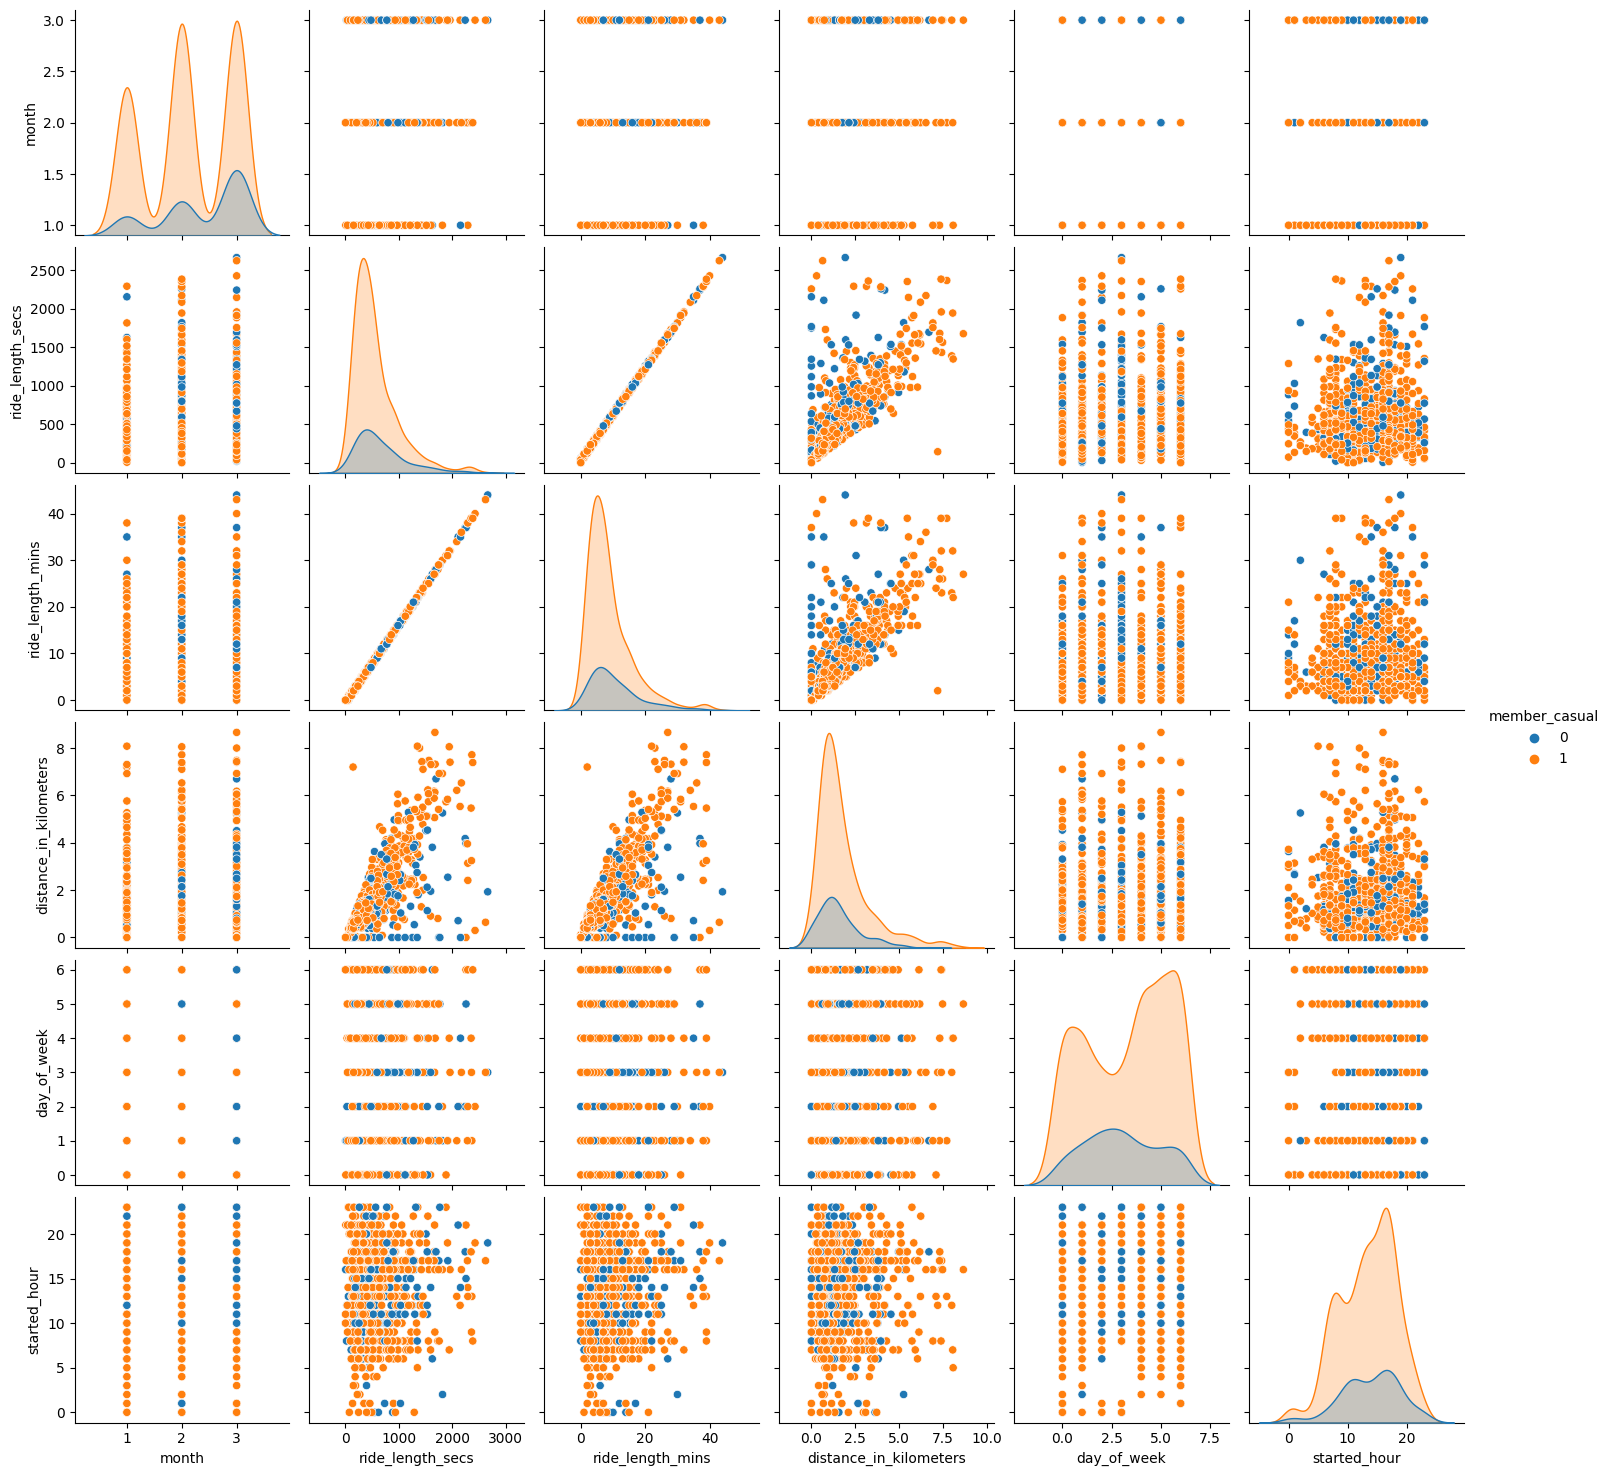

In [55]:
sns.pairplot(p_df, hue="member_casual")

**As can be seen:**
* Member_casual do not really have an obvious relationship with any pair wise variable
* As far as linear relationship are concern distance and ride duration may have a slight correlation but that is it

In [56]:
ols_data = p_df[["distance_in_kilometers", "ride_length_mins"]]
ols_data.head()

,distance_in_kilometers,ride_length_mins
176677,1.551591,14
264165,0.959915,5
268806,0.932548,8
388613,2.770033,14
651304,0.399478,1


In [66]:
ols_formula = "distance_in_kilometers ~ ride_length_mins"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     distance_in_kilometers   R-squared:                       0.517
Model:                                OLS   Adj. R-squared:                  0.516
Method:                     Least Squares   F-statistic:                     1067.
Date:                    Sat, 20 Jul 2024   Prob (F-statistic):          1.02e-159
Time:                            02:59:23   Log-Likelihood:                -1423.4
No. Observations:                    1000   AIC:                             2851.
Df Residuals:                         998   BIC:                             2861.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4370      0.051      8.587      0.000       0.337       0.537
ride_length_mins     0.1412      0.004     32.659      0.000       0.133       0.150
==============================================================================
Omnibus:                      197.353   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3405.246
Skew:                          -0.372   Prob(JB):                         0.00
Kurtosis:                      12.009   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='distance_in_kilometers', ylabel='ride_length_mins'>

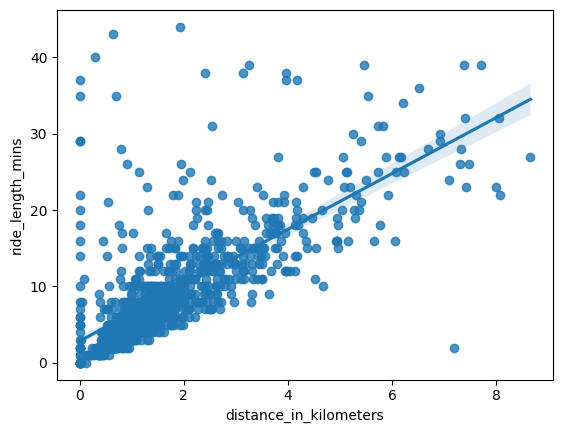

In [67]:
sns.regplot(x = "distance_in_kilometers", y = "ride_length_mins", data = ols_data)

**Linearity**
* It roughly follows the a linear line so it is acceptable

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

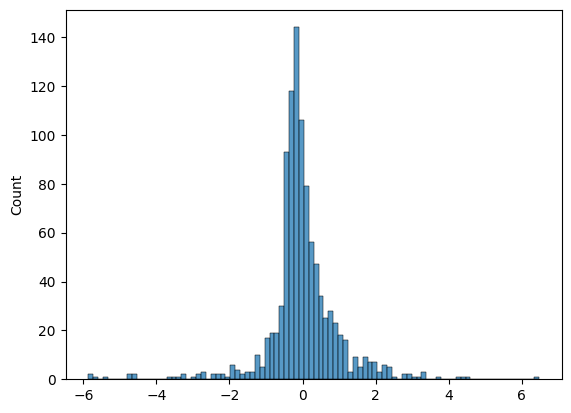

In [68]:
residuals = model.resid
sns.histplot(residuals)

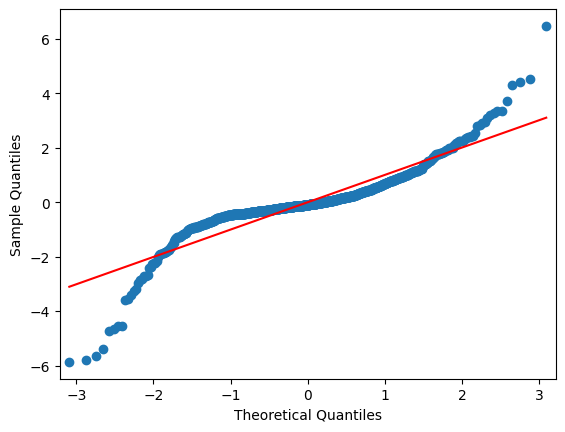

In [64]:
sm.qqplot(residuals, line='s')
plt.show()

**Normality:**
* Requirements for normality is mostly acceptable, it still follow a line with slight curve from a red line
* the distribution is clearly normal distribution

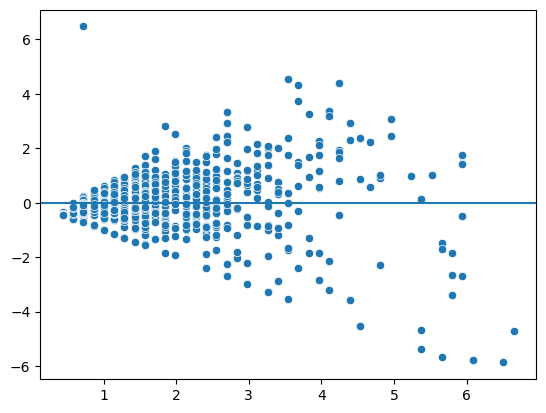

In [65]:
fitted_values = model.predict(ols_data["ride_length_mins"])
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
plt.show()

**Homoscedasticity:**
* Requirements for homoscedasticity is acceptable as there spread below and above line 0